## Auto-generate cluster boundaries with Voronoi

In [1]:
import geopandas
from geopandas import GeoSeries
import shapely.geometry
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#%matplotlib notebook
%matplotlib inline
mpl.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
exterior = geopandas.read_file("convex_hull.geojson")

In [4]:
# load Voronoi polygon
gpd_vp = geopandas.read_file("voronoi_polygons.geojson")

In [5]:
# a function two draw Voronoi polygon and classification
def drawtwoplots(gpd_dt,gpd_pt, title,line=False):
    fig, ax = plt.subplots()
    if line:
        gpd_dt.plot(ax=ax, color='red')
    else:
        gpd_dt.plot(ax=ax, color='white', edgecolor="black")
    gpd_pt.plot(ax=ax, marker='o',column="Label", markersize=10,cmap="brg")
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show();

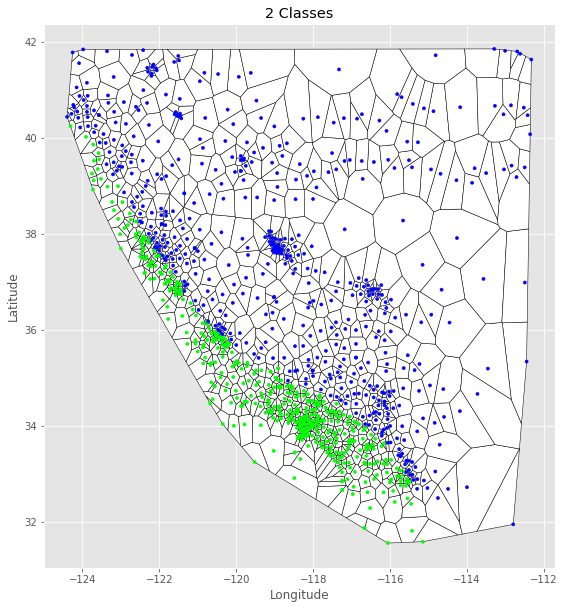

In [6]:
# load 2 class example
gpd = geopandas.read_file("v2class2d_1.geojson")
drawtwoplots(gpd_vp,gpd,"2 Classes")

In [7]:
# update label
gpd_vp['Label'] = gpd_vp['Site'].map(gpd.set_index('Site')['Label'])

<AxesSubplot:>

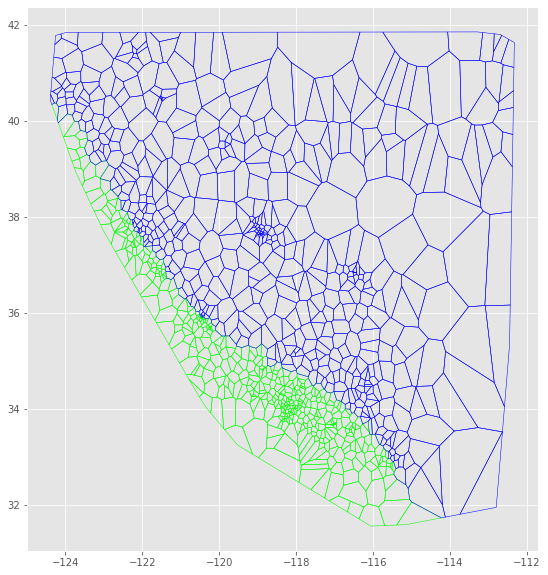

In [8]:
gpd_vp.plot(column="Label",facecolor='none',edgecolor='black',cmap="brg")

In [9]:
# dissove by class
gpd_cl = gpd_vp.dissolve(by='Label')

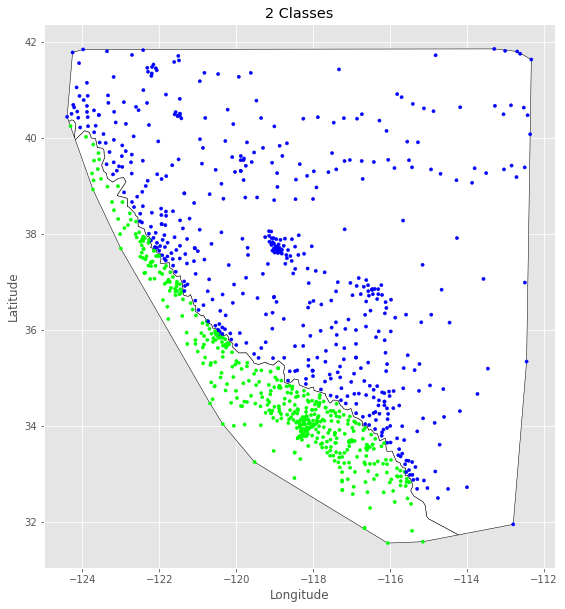

In [10]:
drawtwoplots(gpd_cl,gpd,"2 Classes")

In [11]:
boundaries = geopandas.GeoDataFrame({"geometry":gpd_cl.boundary})

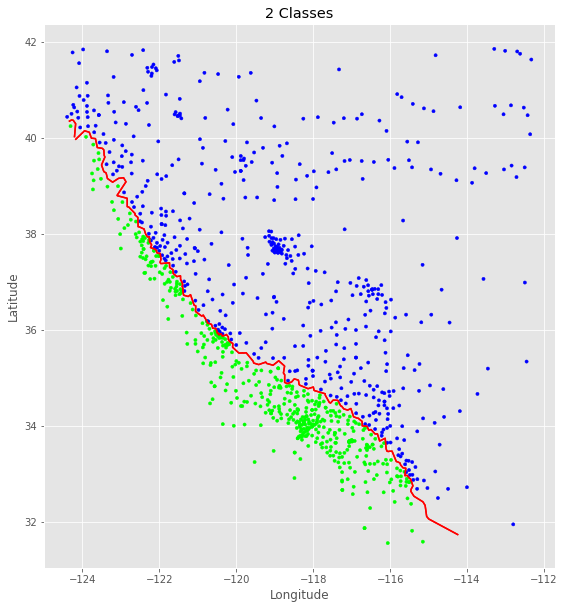

In [12]:
des = geopandas.overlay( boundaries,exterior,how='difference')
drawtwoplots(des,gpd,"2 Classes",line=True)

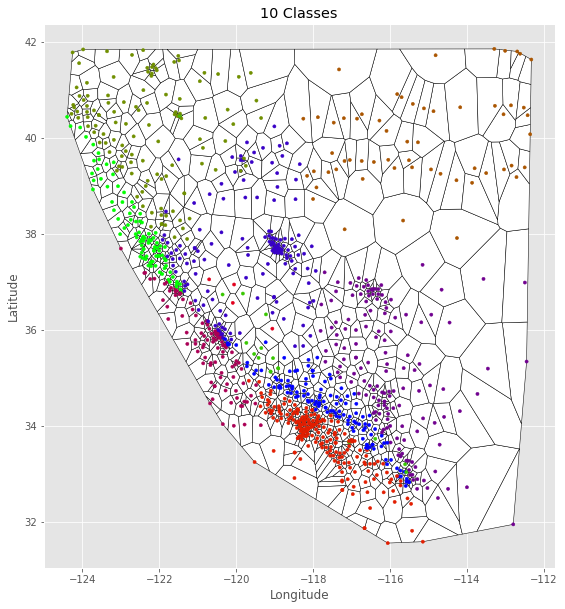

In [13]:
# load 10 class example
gpd = geopandas.read_file("v10class2d_1.geojson")
drawtwoplots(gpd_vp,gpd,"10 Classes")

In [14]:
# update label
gpd_vp['Label'] = gpd_vp['Site'].map(gpd.set_index('Site')['Label'])

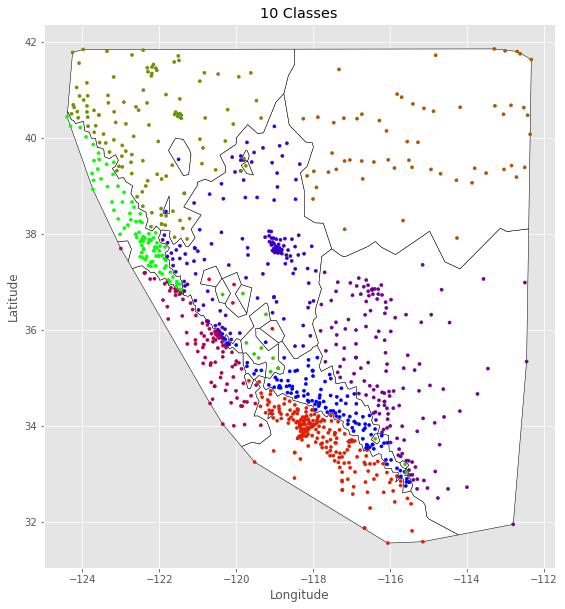

In [15]:
# dissove by class
gpd_cl = gpd_vp.dissolve(by='Label')
gpd_cl['Label'] = gpd_cl.index
drawtwoplots(gpd_cl,gpd,"10 Classes")

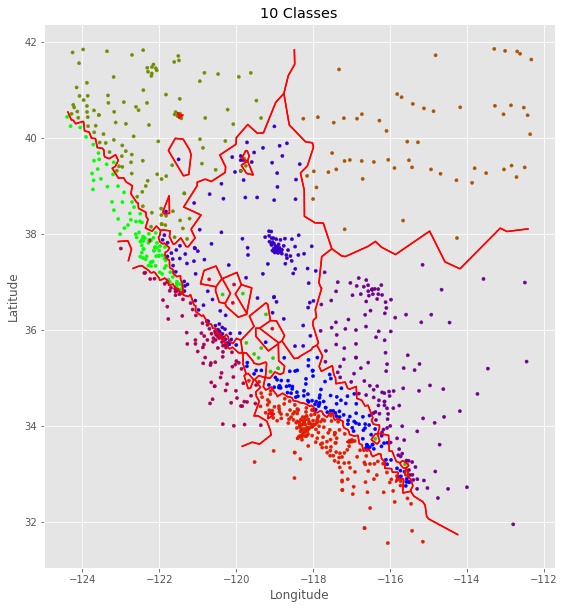

In [16]:
boundaries = geopandas.GeoDataFrame(geometry = gpd_cl.boundary)
exterior = geopandas.GeoDataFrame(geometry = GeoSeries(gpd_cl.unary_union).exterior)
exterior.crs = 'EPSG:4326'
des = geopandas.overlay(boundaries,exterior,how='difference')
drawtwoplots(des,gpd,"10 Classes",line=True)

<AxesSubplot:>

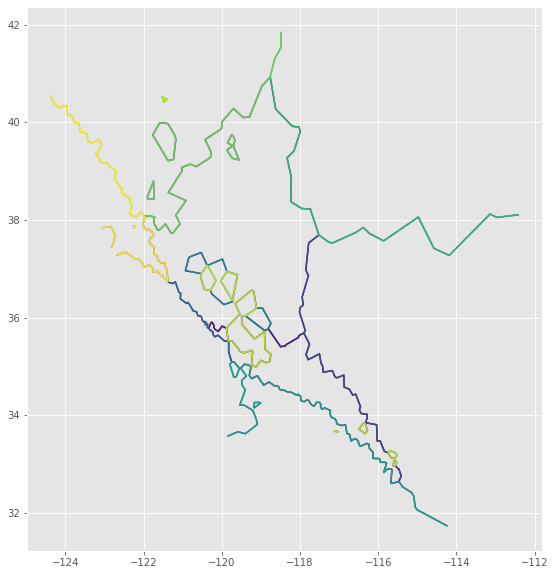

In [17]:
des['Label'] = des.index
des.plot(column="Label")